In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

# Ruta relativa desde el notebook hasta la carpeta que contiene funciones.py
ruta_funciones = os.path.abspath('../utils')
if ruta_funciones not in sys.path:
    sys.path.append(ruta_funciones)

from funciones import filtrar, top_bottom, graficar_barplot, grafico_barras_superpuestas, graficar_correlacion, graficar_anova, obtener_categoria_ingresos, mapa_calor

In [2]:
# Cargar  datos
xlsx = pd.ExcelFile("../data/datos_tratados.xlsx")

# Cargar cada hoja
libros = xlsx.parse("libros")
espectaculos = xlsx.parse("espectaculos")
educacion = xlsx.parse("educacion")
bys = xlsx.parse("bys")
renta = xlsx.parse("renta")
ingresos = xlsx.parse("ingresos")
caracteristicas = xlsx.parse("caracteristicas")

## GRÁFICO 1

In [3]:
bys= bys[bys["Indicador_bys"]=="GASTO MEDIO POR PERSONA (Euros)"]
bys_libros = bys[bys["Grupo de gasto_bys"]=="Libro y publicaciones periódicas"]
bys_libros=bys_libros.groupby("Comunidad autónoma")["Total_bys"].mean()
bys_libros = pd.DataFrame(bys_libros).reset_index()

In [4]:
bys_servicios = bys[bys["Grupo de gasto_bys"]=="Servicios culturales"]
bys_servicios=bys_servicios.groupby("Comunidad autónoma")["Total_bys"].mean()
bys_servicios = pd.DataFrame(bys_servicios)

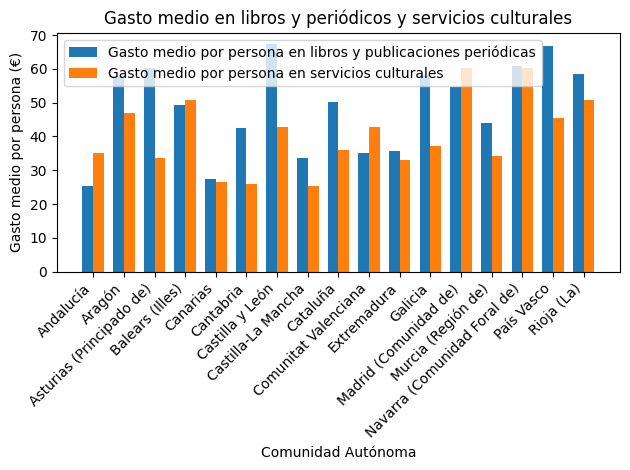

In [5]:
grafico_barras_superpuestas(bys_libros["Comunidad autónoma"], bys_libros["Total_bys"], bys_servicios["Total_bys"], etiqueta1= "Gasto medio por persona en libros y publicaciones periódicas", etiqueta2= "Gasto medio por persona en servicios culturales", titulo="Gasto medio en libros y periódicos y servicios culturales", filename="grafico1")

# GRÁFICOS CATEGORÍA Y CCAA

In [6]:
indicador = "GASTO MEDIO POR PERSONA (Euros)"
libros_pc, periodicos_pc, espect_pc, bys_pc = filtrar(indicador, libros, espectaculos, bys)

# Diccionario de entrada con nombre, DataFrame y columna relevante
dict_seleccion = {
    "Libros": (libros_pc, "Total_libros"),
    "Periódicos": (periodicos_pc, "Total_periodicos"),
    "Espectáculos": (espect_pc, "Total_espectaculos"),
    "BYS": (bys_pc, "Total_bys")
}


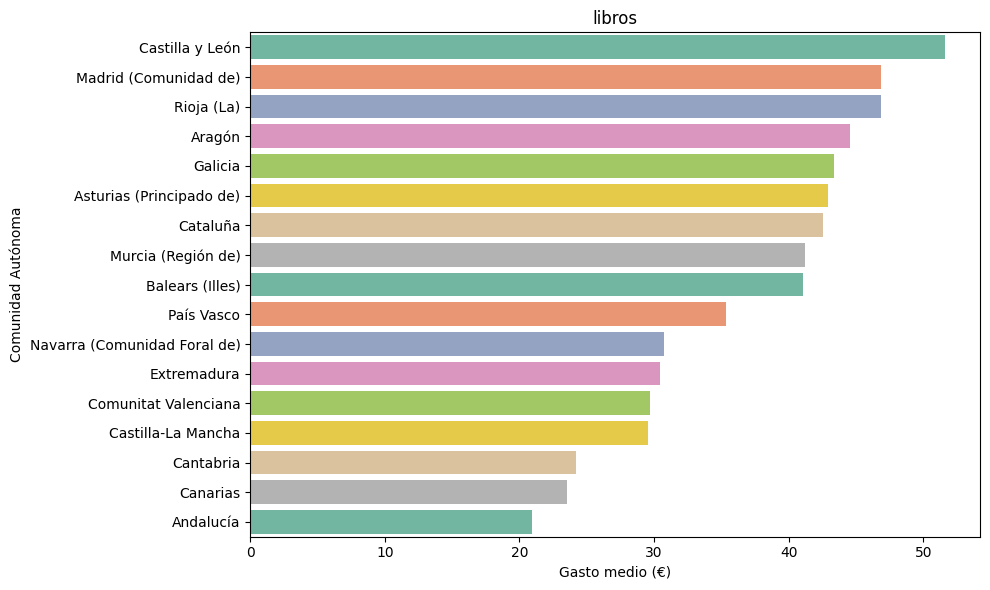

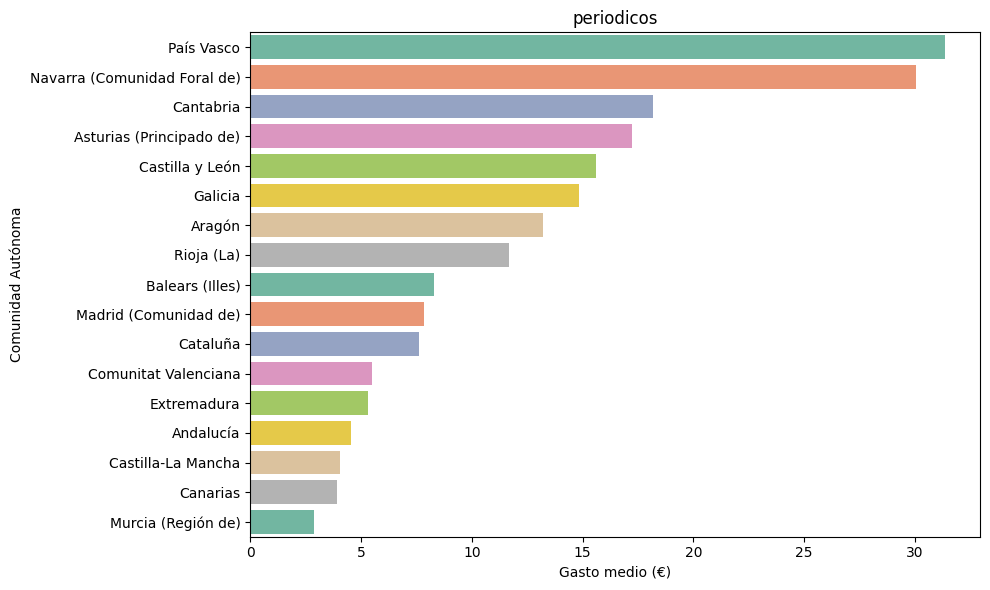

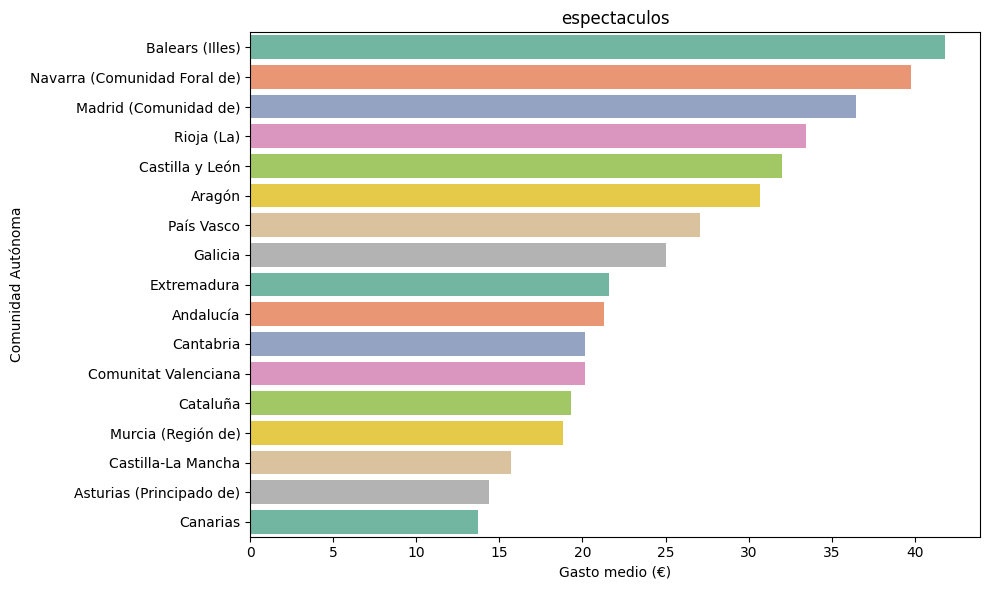

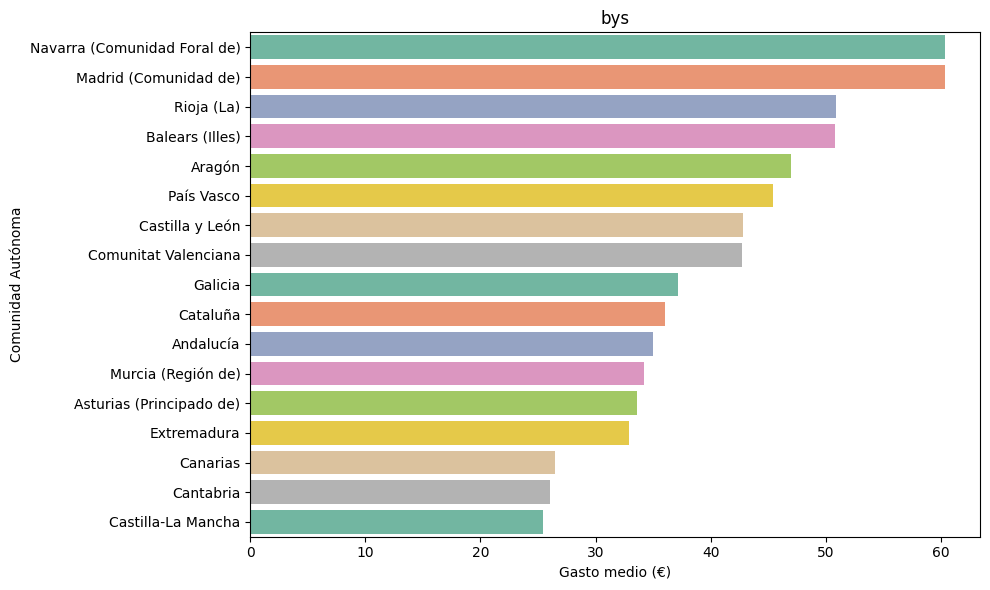

In [7]:
y= "Comunidad autónoma"
a=2
for nombre, (df, columna) in dict_seleccion.items():
    graficar_barplot(df, columna, y, filename=f'grafico{a}')
    a+=1

## SCATTER PLOTS

In [8]:
edu_sup = educacion[
    (educacion["Nivel de formación alcanzado"] == "Educación superior") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior)") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria, con orientación general")]
edu_pc= edu_sup.groupby("Comunidad autónoma")["Total_educacion"].mean().sort_values(ascending=False).reset_index()
edu_pc= pd.DataFrame(edu_pc)
#DF MERGED
df_merged = libros_pc.merge(periodicos_pc, on="Comunidad autónoma")
df_merged = df_merged.merge(espect_pc, on="Comunidad autónoma")
df_merged = df_merged.merge(bys_pc, on="Comunidad autónoma")
df_gasto_educacion = df_merged.merge(edu_pc, on="Comunidad autónoma", how="inner")
df_gasto_educacion= df_gasto_educacion.sort_values(by="Total_educacion", ascending=False)

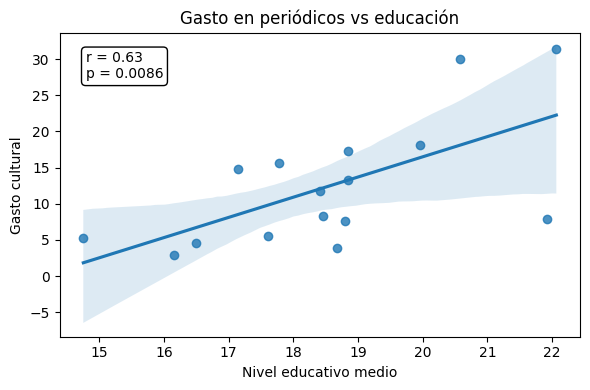

In [9]:
from scipy.stats import pearsonr

corr, p = pearsonr(df_gasto_educacion['Total_educacion'], df_gasto_educacion['Total_periodicos'])
graficar_correlacion(df_gasto_educacion, x="Total_educacion", y= 'Total_periodicos', 
                     titulo= 'Gasto en periódicos vs educación' ,
                     r=corr, p=p, filename= f'grafico6')

## Gráfico renta

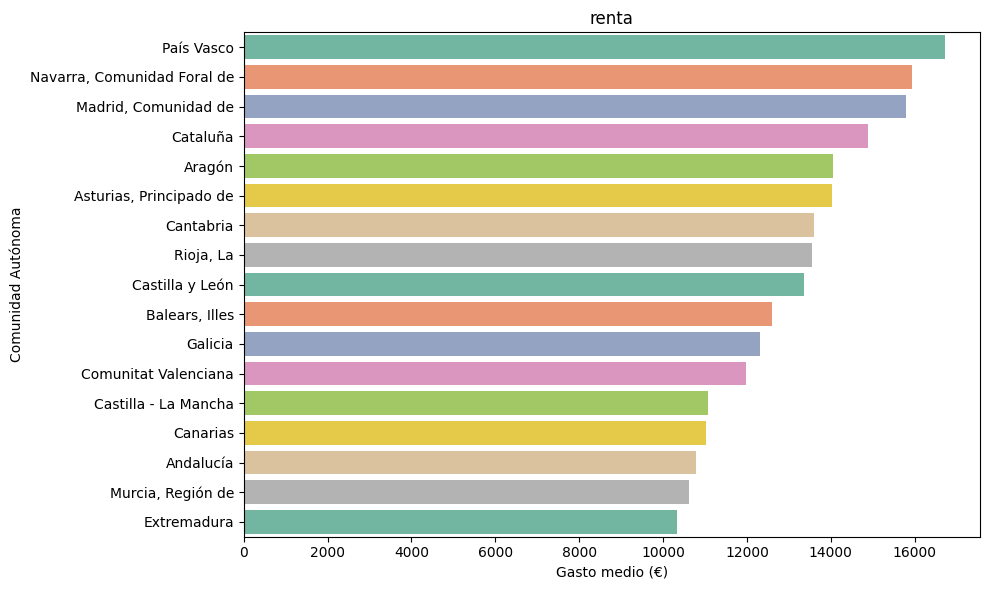

In [10]:
#RENTA
renta_total= renta.groupby(["Comunidad autónoma"])["Total_renta"].mean()
renta_total= renta_total.sort_values(ascending=False)
renta_total = pd.DataFrame(renta_total)

graficar_barplot(renta_total, x="Total_renta", y ="Comunidad autónoma", filename= "grafico7")

## Boxplot

In [11]:
df_filtrado= caracteristicas[caracteristicas["Indicador_caracteristicas"] == indicador].copy()
df_filtrado['Caracteristicas'] = df_filtrado['Características del sustentador principal'].str.strip()
df_filtrado['Edad'] = df_filtrado['Caracteristicas'].where(df_filtrado['Caracteristicas'].str.startswith('Grupo de edad'))
df_filtrado = df_filtrado[["periodo", "Edad", "Total_caracteristicas"]].dropna()

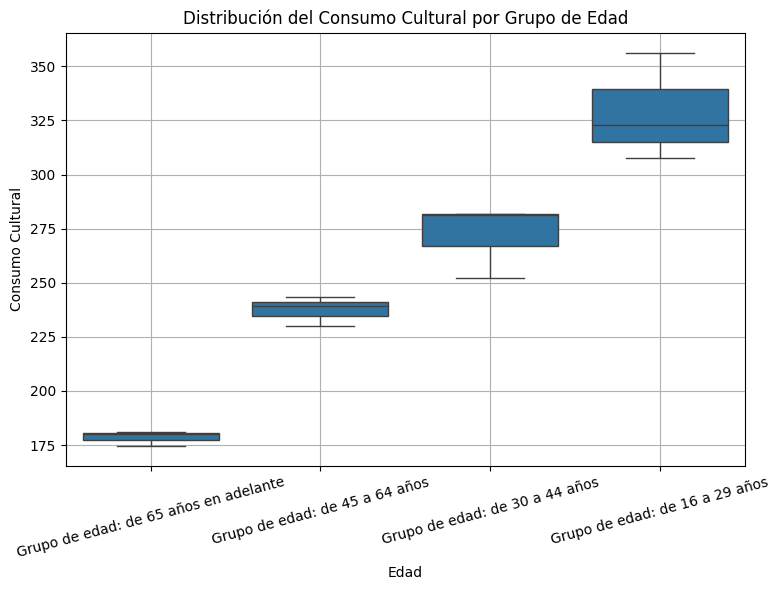

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtrado, x='Edad', y='Total_caracteristicas')
plt.title('Distribución del Consumo Cultural por Grupo de Edad')
plt.ylabel('Consumo Cultural')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../img/grafico8', dpi=300, bbox_inches='tight')
plt.show()

## Barplot educación

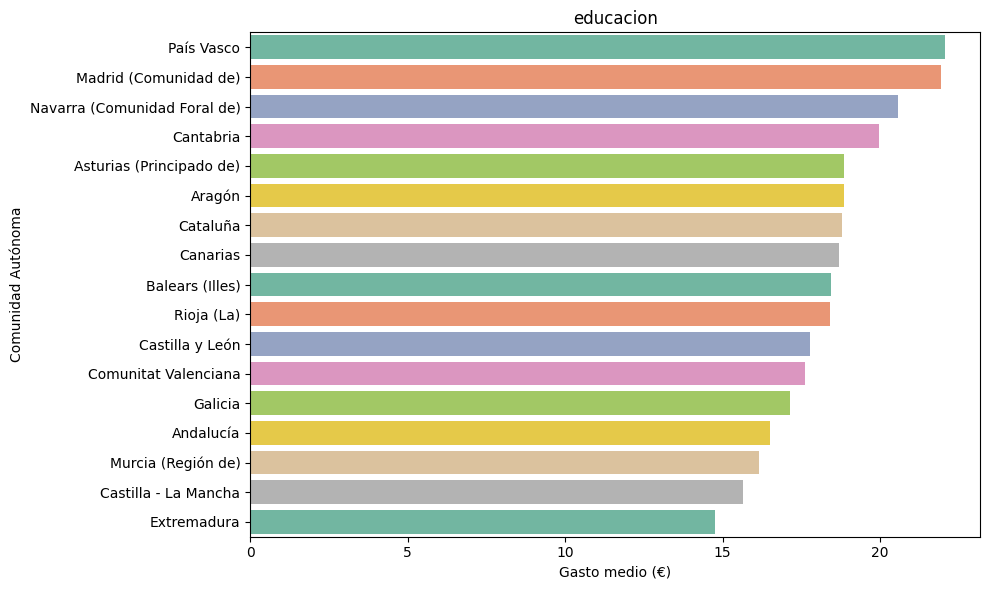

In [13]:
graficar_barplot(edu_pc, x="Total_educacion", y ="Comunidad autónoma", filename= "grafico9")